In [1]:
# From lens to primary...
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy import constants as const
import poppy

# effective focal lengths of tertiary, secondary, primary
f_1 = 155 * u.cm
f_2 = 11940 * u.cm
f_3 = 19.2 * u.cm
tertiary_obj = poppy.QuadraticLens(f_lens=f_3)
secondary_obj = poppy.QuadraticLens(f_lens=f_2)
primary_obj = poppy.QuadraticLens(f_lens=f_1)

# separations 
d_lens_3 = 33.06 * u.cm
d_3_2 = 86.562 * u.cm
d_IF = 19.2 * u.cm
d_2_1 = 104.995 * u.cm


fwhm_ = np.sqrt(np.log(2)/297.4178) * u.m 
ff = 510 * u.GHz #ffs = [510 * u.GHz] # [480*u.GHz,540*u.GHz]
widths=[1.5*u.cm, 2*u.cm, 2.5*u.cm, 3*u.cm]

mirrors=['Tertiary','Secondary','Primary']
for it in np.arange(1,4):    
    plt.figure(it)  
    plt.title(mirrors[it-1]+" E plane")
    plt.xlabel("Position (m)")
    plt.ylabel("Intensity (dB)")
    
for width in widths:
    ll = const.c/ff

    wf = poppy.FresnelWavefront(beam_radius=4*u.cm, wavelength=ll)

    tertiary_obj = poppy.QuadraticLens(f_lens=f_3)
    secondary_obj = poppy.QuadraticLens(f_lens=f_2)
    primary_obj = poppy.QuadraticLens(f_lens=f_1)
    
    lenslet_aperture = poppy.GaussianAperture(fwhm=fwhm_)
    wf *= lenslet_aperture

    ring = poppy.CircularAperture(radius=0.0381*u.m)
    wf *= ring # cold stop
    #y, x = wf.coordinates()
    #initial_power=np.sum(wf.intensity)

    wf.propagate_fresnel(0.635*u.cm)

    # 3 groups of 0.635 cm spaced baffles, each 2.8 cm apart
    for dummyvar in np.arange(1,4):
        for dummyvar2 in np.arange(1,4):
            wf *= ring    
            wf.propagate_fresnel(0.635*u.cm)
        wf *= ring
        wf.propagate_fresnel(2.8*u.cm)
    
    # top group of 9 baffles which are 1 mm wider but still 0.635 cm apart
    ring = poppy.CircularAperture(radius=0.0382*u.m)
    for dummyvar in np.arange(1,9):
        wf *= ring    
        wf.propagate_fresnel(0.635*u.cm)
    wf *= ring    

    wf.propagate_fresnel(14.1455*u.cm) # propogate out to center of tertiary

    wf *= tertiary_obj
    
    y, x = wf.coordinates()
    plt.figure(1)
    plt.plot(x[wf.intensity.shape[1]//2,1024:], 10*np.log10(wf.intensity[wf.intensity.shape[1]//2,1024:]),label=str(width))
    plt.legend()
    plt.axvline(x=0.08)
    
    wf.propagate_fresnel(d_IF)
    
    ring = poppy.CircularAperture(radius=width) # baffle at intermediate focus
    wf *= ring
    
    wf.propagate_fresnel(d_3_2-d_IF)
    
    wf *= secondary_obj
    
    y, x = wf.coordinates()
    plt.figure(2)
    plt.plot(x[wf.intensity.shape[1]//2,1024:], 10*np.log10(wf.intensity[wf.intensity.shape[1]//2,1024:]),label=str(width))
    plt.legend()
    plt.axvline(x=0.147)
    
    wf.propagate_fresnel(d_2_1)
               
    y, x = wf.coordinates()
    plt.figure(3)
    plt.plot(x[wf.intensity.shape[1]//2,1024:], 10*np.log10(wf.intensity[wf.intensity.shape[1]//2,1024:]),label=str(width))
    plt.legend()
    plt.axvline(x=0.4)
    
for it in np.arange(1,4):    
    plt.figure(it)
    plt.show()
    #plt.savefig(mirrors[it-1]+'_Ecut.png')
    plt.clf()

#a=0 # Toggles zoom
#b=2048-a
#fig, ax = plt.subplots()
#c=ax.pcolormesh(x[a:b,a:b],y[a:b,a:b],10*np.log10(wf.intensity[a:b,a:b]))
#fig.colorbar(c,ax=ax)
#plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [5]:
# what radius on the primary cooresponds to 15 deg ?
import numpy as np
from math import pi
r=(d_2_1+d_3_2-d_IF)*np.tan(15*pi/180)
print("40 dB down at: %.2f cm" %r.value)

40 dB down at: 46.18 cm


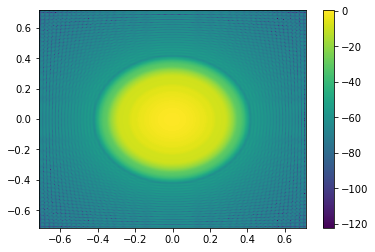

In [2]:
a=0 # Toggles zoom
b=2048-a
fig, ax = plt.subplots()
c=ax.pcolormesh(x[a:b,a:b],y[a:b,a:b],10*np.log10(wf.intensity[a:b,a:b]))
fig.colorbar(c,ax=ax)
plt.show()
plt.close()

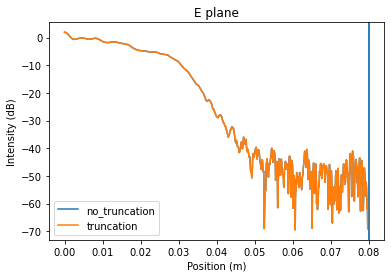

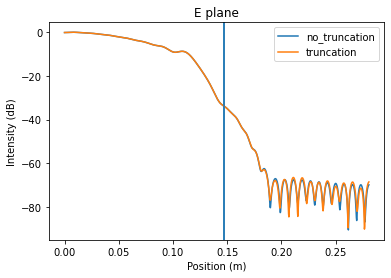

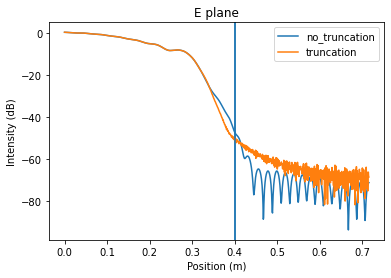

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [1]:
# From lens to primary if we truncate beam at ~radius of mirrors ...
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy import constants as const
import poppy

# effective focal lengths of tertiary, secondary, primary
f_1 = 155 * u.cm
f_2 = 11940 * u.cm
f_3 = 19.2 * u.cm
tertiary_obj = poppy.QuadraticLens(f_lens=f_3)
secondary_obj = poppy.QuadraticLens(f_lens=f_2)
primary_obj = poppy.QuadraticLens(f_lens=f_1)

# separations 
d_lens_3 = 33.06 * u.cm
d_3_2 = 86.562 * u.cm
d_2_1 = 104.995 * u.cm
d_IF = 19.2 * u.cm

fwhm_ = np.sqrt(np.log(2)/297.4178) * u.m 
ff = 510 * u.GHz #ffs = [510 * u.GHz] # [480*u.GHz,540*u.GHz]
width=2.5*u.cm #widths=[1.5*u.cm, 2*u.cm, 2.5*u.cm, 3*u.cm]

for it in np.arange(1,4):    
    plt.figure(it)  
    plt.title("E plane")
    plt.xlabel("Position (m)")
    plt.ylabel("Intensity (dB)")
    
for cut in ['no truncation', 'truncation']:
    ll = const.c/ff

    wf = poppy.FresnelWavefront(beam_radius=4*u.cm, wavelength=ll)

    tertiary_obj = poppy.QuadraticLens(f_lens=f_3)
    secondary_obj = poppy.QuadraticLens(f_lens=f_2)
    primary_obj = poppy.QuadraticLens(f_lens=f_1)
    
    lenslet_aperture = poppy.GaussianAperture(fwhm=fwhm_)
    wf *= lenslet_aperture

    ring = poppy.CircularAperture(radius=0.0381*u.m)
    wf *= ring # cold stop
    #y, x = wf.coordinates()
    #initial_power=np.sum(wf.intensity)

    wf.propagate_fresnel(0.635*u.cm)

    # 3 groups of 0.635 cm spaced baffles, each 2.8 cm apart
    for dummyvar in np.arange(1,4):
        for dummyvar2 in np.arange(1,4):
            wf *= ring    
            wf.propagate_fresnel(0.635*u.cm)
        wf *= ring
        wf.propagate_fresnel(2.8*u.cm)
    
    # top group of 9 baffles which are 1 mm wider but still 0.635 cm apart
    ring = poppy.CircularAperture(radius=0.0382*u.m)
    for dummyvar in np.arange(1,9):
        wf *= ring    
        wf.propagate_fresnel(0.635*u.cm)
    wf *= ring    

    wf.propagate_fresnel(14.1455*u.cm) # propogate out to center of tertiary

    wf *= tertiary_obj
      
    y, x = wf.coordinates()
    plt.figure(1)
    plt.plot(x[wf.intensity.shape[1]//2,1024:], 10*np.log10(wf.intensity[wf.intensity.shape[1]//2,1024:]),label=cut)
    plt.legend()
    plt.axvline(x=0.08)
    
    if cut == 'truncation':    
        ring = poppy.CircularAperture(radius=8*u.cm) # baffle to cutoff unreflected light
        wf *= ring

    wf.propagate_fresnel(d_IF)
    
    ring = poppy.CircularAperture(radius=width) # baffle at intermediate focus
    wf *= ring
    
    wf.propagate_fresnel(d_3_2-d_IF)
    
    wf *= secondary_obj

    y, x = wf.coordinates()
    plt.figure(2)
    plt.plot(x[wf.intensity.shape[1]//2,1024:], 10*np.log10(wf.intensity[wf.intensity.shape[1]//2,1024:]),label=cut)
    plt.legend()
    plt.axvline(x=0.147)
    
    if cut == 'truncation':
        ring = poppy.CircularAperture(radius=14.7*u.cm) # baffle to cutoff unreflected light
        wf *= ring   
    
    wf.propagate_fresnel(d_2_1)
               
    y, x = wf.coordinates()
    plt.figure(3)
    plt.plot(x[wf.intensity.shape[1]//2,1024:], 10*np.log10(wf.intensity[wf.intensity.shape[1]//2,1024:]),label=cut)
    plt.legend()
    plt.axvline(x=0.4)
    
for it in np.arange(1,4):    
    plt.figure(it)
    plt.show()
    plt.clf()

#a=0 # Toggles zoom
#b=2048-a
#fig, ax = plt.subplots()
#c=ax.pcolormesh(x[a:b,a:b],y[a:b,a:b],10*np.log10(wf.intensity[a:b,a:b]))
#fig.colorbar(c,ax=ax)
#plt.show()

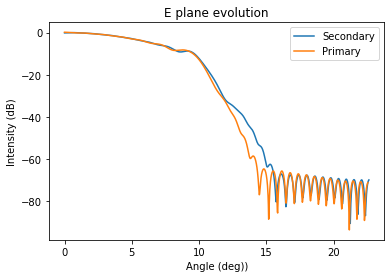

In [8]:
# From lens to primary, test angular dependence on secondary vs on tertiary
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy import constants as const
import poppy
import math

# effective focal lengths of tertiary, secondary, primary
f_1 = 155 * u.cm
f_2 = 11940 * u.cm
f_3 = 19.2 * u.cm
tertiary_obj = poppy.QuadraticLens(f_lens=f_3)
secondary_obj = poppy.QuadraticLens(f_lens=f_2)
primary_obj = poppy.QuadraticLens(f_lens=f_1)

# separations 
d_lens_3 = 33.06 * u.cm
d_3_2 = 86.562 * u.cm
d_2_1 = 104.995 * u.cm
d_IF = 19.2 * u.cm

fwhm_ = np.sqrt(np.log(2)/297.4178) * u.m 
ff = 510 * u.GHz #ffs = [510 * u.GHz] # [480*u.GHz,540*u.GHz]
widths=[2.5*u.cm]

mirrors=['Tertiary','Secondary','Primary']
plt.figure()  
plt.title("E plane evolution")
plt.xlabel("Angle (deg))")
plt.ylabel("Intensity (dB)")
    
for width in widths:
    ll = const.c/ff

    wf = poppy.FresnelWavefront(beam_radius=4*u.cm, wavelength=ll)

    tertiary_obj = poppy.QuadraticLens(f_lens=f_3)
    secondary_obj = poppy.QuadraticLens(f_lens=f_2)
    primary_obj = poppy.QuadraticLens(f_lens=f_1)
    
    lenslet_aperture = poppy.GaussianAperture(fwhm=fwhm_)
    wf *= lenslet_aperture

    ring = poppy.CircularAperture(radius=0.0381*u.m)
    wf *= ring # cold stop
    #y, x = wf.coordinates()
    #initial_power=np.sum(wf.intensity)

    wf.propagate_fresnel(0.635*u.cm)

    # 3 groups of 0.635 cm spaced baffles, each 2.8 cm apart
    for dummyvar in np.arange(1,4):
        for dummyvar2 in np.arange(1,4):
            wf *= ring    
            wf.propagate_fresnel(0.635*u.cm)
        wf *= ring
        wf.propagate_fresnel(2.8*u.cm)
    
    # top group of 9 baffles which are 1 mm wider but still 0.635 cm apart
    ring = poppy.CircularAperture(radius=0.0382*u.m)
    for dummyvar in np.arange(1,9):
        wf *= ring    
        wf.propagate_fresnel(0.635*u.cm)
    wf *= ring    

    wf.propagate_fresnel(14.1455*u.cm) # propogate out to center of tertiary

    wf *= tertiary_obj
    
    wf.propagate_fresnel(d_IF)
    
    ring = poppy.CircularAperture(radius=width) # baffle at intermediate focus
    wf *= ring
    
    wf.propagate_fresnel(d_3_2-d_IF)
    
    wf *= secondary_obj
        
    y, x = wf.coordinates()
    x=x*100
    angle=(180/math.pi)*np.arctan(x[wf.intensity.shape[1]//2,1024:]/(d_3_2.value-d_IF.value))
    plt.plot(angle, 10*np.log10(wf.intensity[wf.intensity.shape[1]//2,1024:]),label='Secondary')
    
    wf.propagate_fresnel(d_2_1)
               
    y, x = wf.coordinates()
    x=x*100
    angle=(180/math.pi)*np.arctan(x[wf.intensity.shape[1]//2,1024:]/(d_3_2.value+d_2_1.value-d_IF.value))
    plt.plot(angle, 10*np.log10(wf.intensity[wf.intensity.shape[1]//2,1024:]),label='Primary')
    plt.legend()
    

plt.show()
#plt.savefig(mirrors[it-1]+'_Ecut.png')
#plt.clf()

#a=0 # Toggles zoom
#b=2048-a
#fig, ax = plt.subplots()
#c=ax.pcolormesh(x[a:b,a:b],y[a:b,a:b],10*np.log10(wf.intensity[a:b,a:b]))
#fig.colorbar(c,ax=ax)
#plt.show()